### Notebook to make plots for catalog of FRBs
Jessie Thwaites, 9/28

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.time import Time

import catalogs_to_csv as cat
import frb_catalog_plots as plot

Loading all FRBs from catalogs


In [7]:
mpl.rcParams['font.size'] = 20
frbs=cat.load_frbs() #All combined FRB data previously put into a csv file

Loading all FRBs from catalogs


In [8]:
rep=np.where(frbs['repeater'])[0]
non_rep=np.where(frbs['repeater']==False)[0]

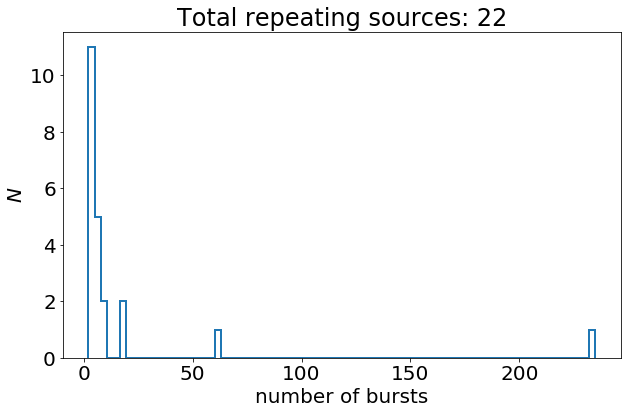

In [10]:
"""Histogram of number of bursts per repeater"""

unique_rep, counts=np.unique([frbs['src'][i] for i in rep], return_counts=True)
    
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(counts, histtype='step', lw=2., bins=80)
plt.xlabel('number of bursts')
plt.ylabel(r'$N$')
plt.title('Total repeating sources: %i'%len(unique_rep))
plt.savefig('/home/jthwaites/public_html/frb_param_plots/rep_bursts.png')

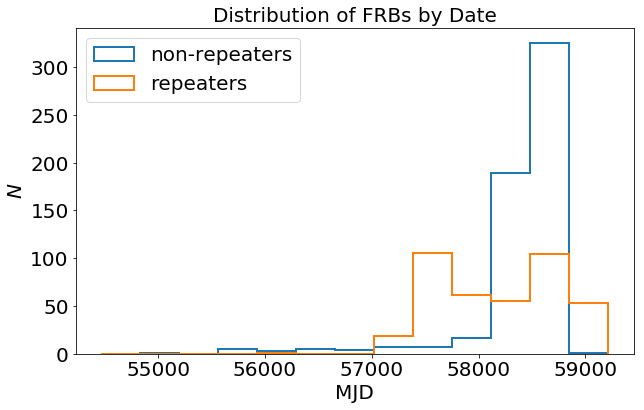

In [11]:
"""Histogram of number of FRBs discovered over time
Repeaters/non-repeater bursts seperated"""

year_bins = [Time(f'20{year:02d}-01-01 00:00:00', format='iso').mjd 
             for year in range(8, 22)]
fig, ax = plt.subplots(figsize=(10,6))
plt.hist([frbs['mjd'][i] for i in non_rep], bins=year_bins, histtype='step', lw=2., 
             label='non-repeaters')
plt.hist([frbs['mjd'][i] for i in rep], bins=year_bins, histtype='step', lw=2., 
             label='repeaters')

plt.legend(loc=2)
plt.xlabel('MJD')
plt.ylabel(r'$N$')
ax.set_title(r'Distribution of FRBs by Date', fontsize=20)
plt.savefig('/home/jthwaites/public_html/frb_param_plots/date_distr.png')